In [328]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [338]:
df = pd.read_csv('ods.csv', on_bad_lines='skip', sep=';', encoding='utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8092 entries, 0 to 8091
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   data            8092 non-null   object
 1   uri             8092 non-null   object
 2   idioma          8092 non-null   object
 3   editor          8092 non-null   object
 4   programa        8092 non-null   object
 5   direito_acesso  8092 non-null   object
 6   departamento    8092 non-null   object
 7   area_cnpq       8092 non-null   object
 8   titulo          8092 non-null   object
 9   tipo            8092 non-null   object
 10  patrocinio      8092 non-null   object
 11  keywords        8092 non-null   object
 12  abstract        8092 non-null   object
 13  palavras_chave  8092 non-null   object
 14  resumo          8092 non-null   object
 15  ODS             2987 non-null   object
dtypes: object(16)
memory usage: 1011.6+ KB


In [344]:
# Assuming 'df' is your DataFrame and 'palavras_chave' is the column containing keywords
# Separating keywords grouped in a string
keywords_series = df['palavras_chave'].str.split('|').explode()

# Using value_counts to count the frequency of each keyword
frequencia_palavras_chave = keywords_series.str.strip().value_counts()

# Getting the top 10 occurrences
top_20_occurrences = frequencia_palavras_chave.head(20)

# Creating a DataFrame from the top 10 occurrences
top_20_df = pd.DataFrame({'Palavra-Chave': top_20_occurrences.index, 'Frequência': top_20_occurrences.values})

# Displaying the DataFrame with the top 10 occurrences
top_20_df

,Palavra-Chave,Frequência
0,Matematica -- Estudo e ensino,172
1,Educacao matematica,147
2,Currículo,126
3,0,117
4,Psicanálise,108
5,Identidade,108
6,Formação de professores,98
7,Envelhecimento,97
8,Comunicação,91
9,Educação,90


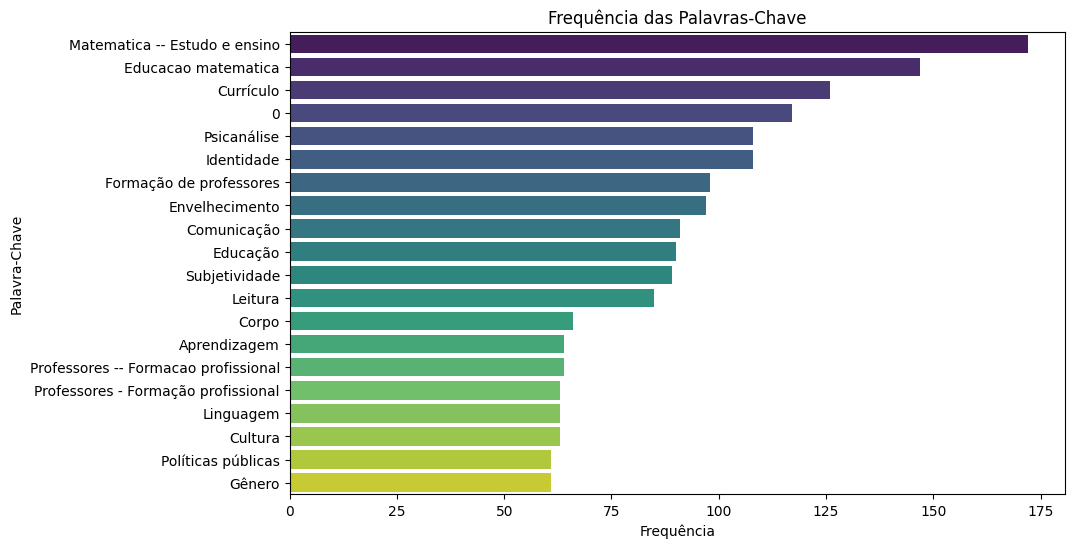

In [345]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequência', y='Palavra-Chave', data=top_20_df, palette='viridis')
plt.xlabel('Frequência')
plt.ylabel('Palavra-Chave')
plt.title('Frequência das Palavras-Chave')
plt.show()

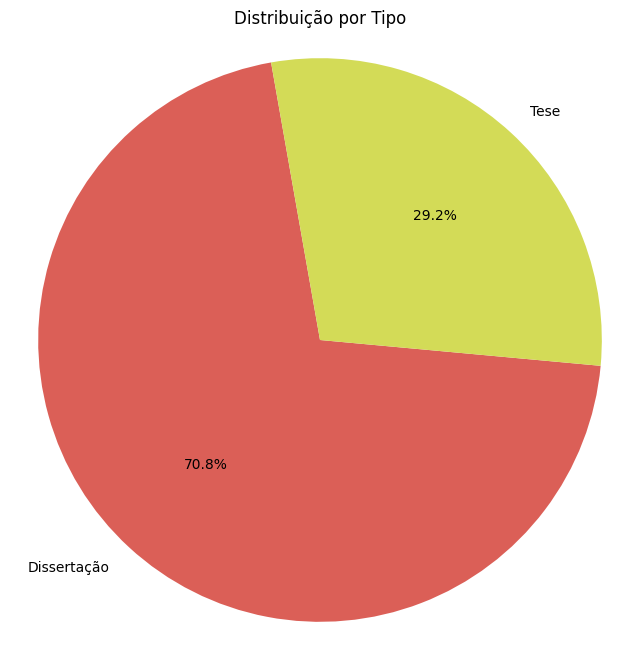

In [331]:
# Assuming df is your DataFrame with a column named 'tipo'
tipo_counts = df['tipo'].value_counts()

plt.figure(figsize=(8, 8))

# Set the viridis color palette
sns.set_palette("hls")

plt.pie(tipo_counts, labels=tipo_counts.index, autopct='%1.1f%%', startangle=100)
plt.title('Distribuição por Tipo')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

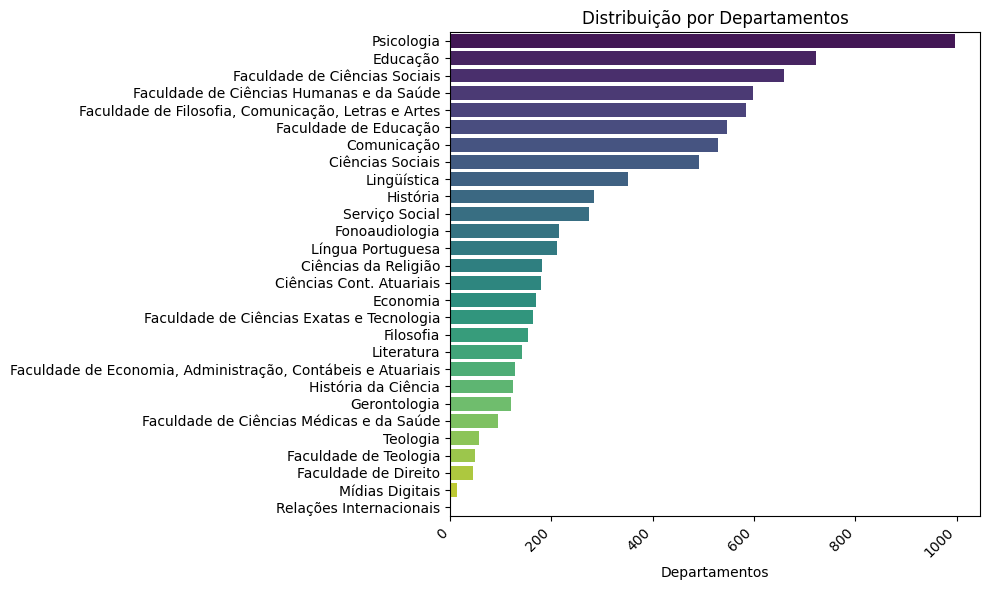

In [332]:
# Count the occurrences of each department
departamentos_counts = df['departamento'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x=departamentos_counts.values, y=departamentos_counts.index, palette='viridis')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Departamentos')
plt.ylabel('')
plt.title('Distribuição por Departamentos')

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [333]:
df.dropna(inplace=True)

In [334]:
# Now let's count the occurrences of each ODS
ods_counts = {}

for ods in range(1, 17):
    ods_str = 'ods' + str(ods)
    ods_counts[ods_str] = df['ODS'].apply(lambda x: str(x).count(ods_str)).sum()

In [335]:
ods_counts

{'ods1': 3019,
 'ods2': 76,
 'ods3': 289,
 'ods4': 250,
 'ods5': 75,
 'ods6': 2,
 'ods7': 8,
 'ods8': 186,
 'ods9': 15,
 'ods10': 1665,
 'ods11': 156,
 'ods12': 27,
 'ods13': 4,
 'ods14': 6,
 'ods15': 6,
 'ods16': 1084}

In [336]:
data = {
    'ods1': 3019,
    'ods2': 76,
    'ods3': 289,
    'ods4': 250,
    'ods5': 75,
    'ods6': 2,
    'ods7': 8,
    'ods8': 186,
    'ods9': 15,
    'ods10': 1665,
    'ods11': 156,
    'ods12': 27,
    'ods13': 4,
    'ods14': 6,
    'ods15': 6,
    'ods16': 1084
}

df = pd.DataFrame(list(data.items()), columns=['ODS', 'Value'])

Text(0.5, 1.0, 'Distribuição pos ods')

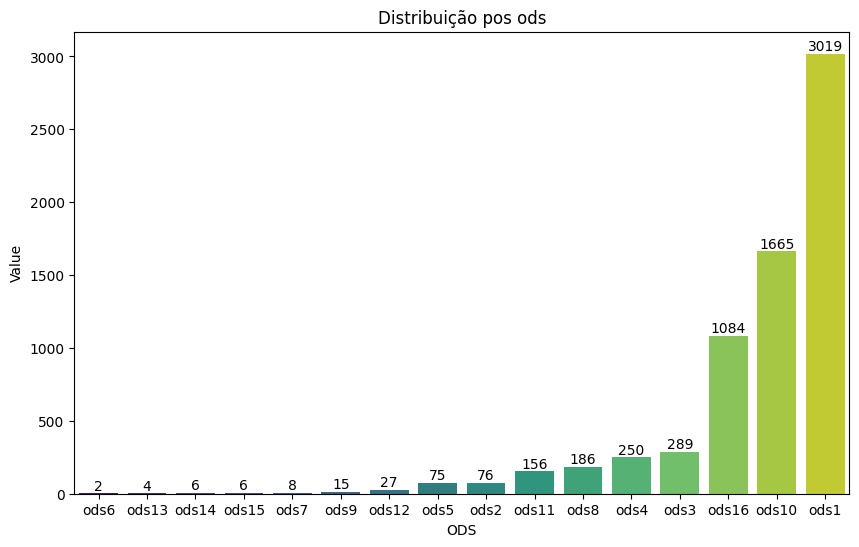

In [337]:
plt.figure(figsize=(10,6))

ax = sns.barplot(df, x="ODS", y="Value", estimator="sum", errorbar=None, order=df.groupby("ODS")["Value"].sum().sort_values(ascending=True).index, palette='viridis')
ax.bar_label(ax.containers[0], fontsize=10);

plt.title('Distribuição pos ods')